In [2]:
#mount google drive
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [1]:
!unzip /content/drive/MyDrive/STUDY/MSc/Assignment/CNN_assignment.zip

Archive:  /content/drive/MyDrive/STUDY/MSc/Assignment/CNN_assignment.zip
  inflating: Skin cancer ISIC The International Skin Imaging Collaboration/Test/actinic keratosis/ISIC_0010512.jpg  
  inflating: Skin cancer ISIC The International Skin Imaging Collaboration/Test/actinic keratosis/ISIC_0010889.jpg  
  inflating: Skin cancer ISIC The International Skin Imaging Collaboration/Test/actinic keratosis/ISIC_0024468.jpg  
  inflating: Skin cancer ISIC The International Skin Imaging Collaboration/Test/actinic keratosis/ISIC_0024470.jpg  
  inflating: Skin cancer ISIC The International Skin Imaging Collaboration/Test/actinic keratosis/ISIC_0024511.jpg  
  inflating: Skin cancer ISIC The International Skin Imaging Collaboration/Test/actinic keratosis/ISIC_0024646.jpg  
  inflating: Skin cancer ISIC The International Skin Imaging Collaboration/Test/actinic keratosis/ISIC_0024654.jpg  
  inflating: Skin cancer ISIC The International Skin Imaging Collaboration/Test/actinic keratosis/ISIC_00247

In [ ]:
# Import all the libraries


Few train images:


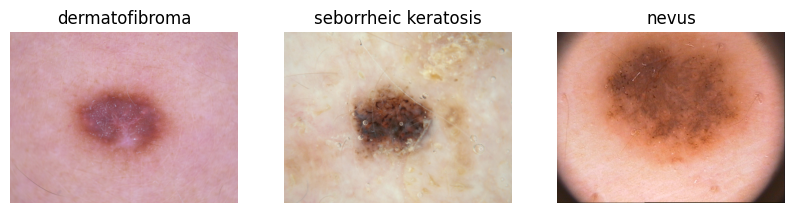

Few test images:


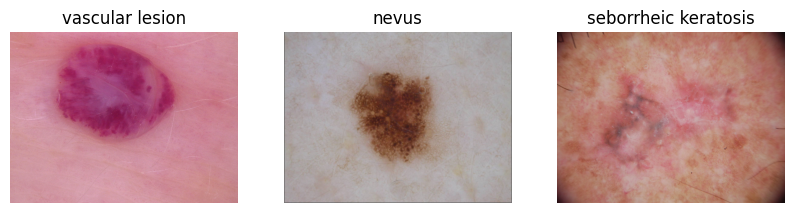

In [3]:
import os
import matplotlib.pyplot as plt
import random
import matplotlib.image as mpimg

# Define the root directory where your dataset is located
dataset_root = "/content/Skin cancer ISIC The International Skin Imaging Collaboration"

# Define the paths to the train and test directories
train_dir = os.path.join(dataset_root, "Train")
test_dir = os.path.join(dataset_root, "Test")

# Function to display random images from a directory
def train_test_visualization(directory, num_images=3):
    plt.figure(figsize=(10, 5))
    for i in range(num_images):
        class_name = random.choice(os.listdir(directory))
        class_dir = os.path.join(directory, class_name)
        image_name = random.choice(os.listdir(class_dir))
        image_path = os.path.join(class_dir, image_name)
        image = mpimg.imread(image_path)
        plt.subplot(1, num_images, i + 1)
        plt.imshow(image)
        plt.title(class_name)
        plt.axis('off')
    plt.show()

# Display random images from the train directory
print("Few train images:")
train_test_visualization(train_dir)

# Display random images from the test directory
print("Few test images:")
train_test_visualization(test_dir)


In [4]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Define constants
IMAGE_SIZE = (180, 180)
BATCH_SIZE = 32
SEED = 42
VALIDATION_SPLIT = 0.2

# Create ImageDataGenerator for train data with augmentation
train_datagen = ImageDataGenerator(
    rescale=1./255,
    validation_split=VALIDATION_SPLIT,
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest'
)

# Create ImageDataGenerator for validation data (only rescaling)
validation_datagen = ImageDataGenerator(
    rescale=1./255,
    validation_split=VALIDATION_SPLIT
)

# Create train generator
train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=IMAGE_SIZE,
    batch_size=BATCH_SIZE,
    class_mode='categorical',
    subset='training',
    seed=SEED
)

# Create validation generator
validation_generator = validation_datagen.flow_from_directory(
    train_dir,
    target_size=IMAGE_SIZE,
    batch_size=BATCH_SIZE,
    class_mode='categorical',
    subset='validation',
    seed=SEED
)


Found 1795 images belonging to 9 classes.
Found 444 images belonging to 9 classes.


Samples from the training set:


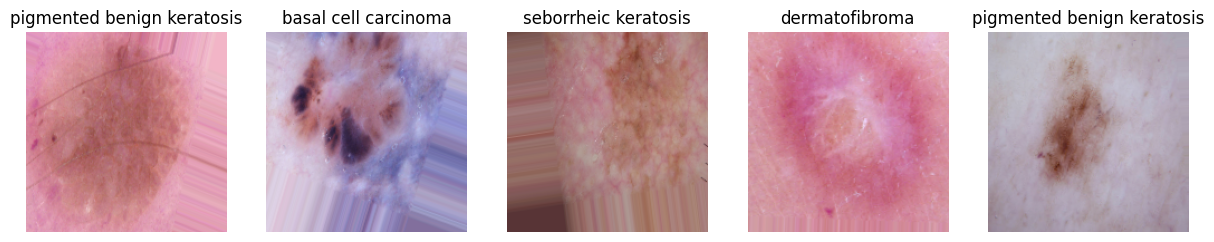

Samples from the validation set:


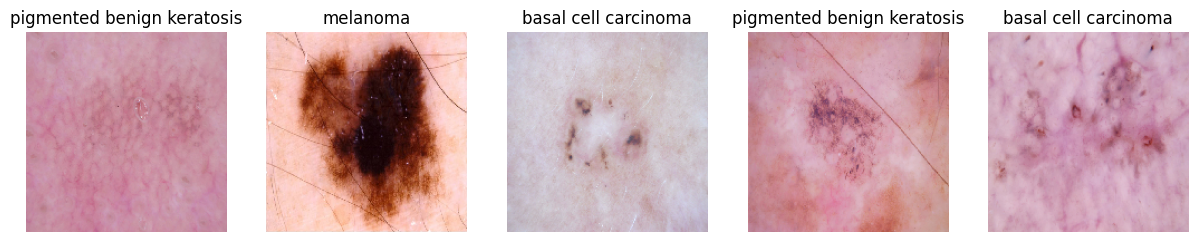

In [5]:
import matplotlib.pyplot as plt

# Function to visualize sample images from a generator
def visualize_samples(generator, num_samples=5):
    # Get batch of images and labels
    images, labels = next(generator)
    class_names = list(generator.class_indices.keys())

    # Plot sample images
    plt.figure(figsize=(15, 10))
    for i in range(num_samples):
        plt.subplot(1, num_samples, i+1)
        plt.imshow(images[i])
        class_index = tf.argmax(labels[i]).numpy()
        plt.title(class_names[class_index])
        plt.axis('off')
    plt.show()

# Visualize samples from the training set
print("Samples from the training set:")
visualize_samples(train_generator)

# Visualize samples from the validation set
print("Samples from the validation set:")
visualize_samples(validation_generator)


Epoch 1/20
56/56 [==============================] - 41s 634ms/step - loss: 1.9610 - accuracy: 0.2978 - val_loss: 1.7765 - val_accuracy: 0.3005
Epoch 2/20
56/56 [==============================] - 34s 612ms/step - loss: 1.6254 - accuracy: 0.4124 - val_loss: 1.9676 - val_accuracy: 0.3438
Epoch 3/20
56/56 [==============================] - 35s 622ms/step - loss: 1.5113 - accuracy: 0.4685 - val_loss: 1.6623 - val_accuracy: 0.4519
Epoch 4/20
56/56 [==============================] - 34s 607ms/step - loss: 1.4602 - accuracy: 0.4799 - val_loss: 1.9055 - val_accuracy: 0.4327
Epoch 5/20
56/56 [==============================] - 33s 598ms/step - loss: 1.3861 - accuracy: 0.5139 - val_loss: 1.8660 - val_accuracy: 0.4423
Epoch 6/20
56/56 [==============================] - 45s 806ms/step - loss: 1.3787 - accuracy: 0.5048 - val_loss: 1.8808 - val_accuracy: 0.4543
Epoch 7/20
56/56 [==============================] - 35s 620ms/step - loss: 1.3407 - accuracy: 0.5298 - val_loss: 1.7041 - val_accuracy: 0.4567

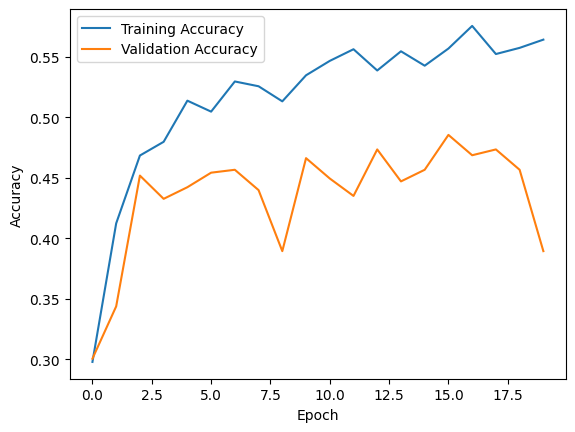

In [6]:
import tensorflow as tf
from tensorflow.keras import layers, models

# Define the CNN model
def create_model(input_shape, num_classes):
    model = models.Sequential([
        layers.Conv2D(32, (3, 3), activation='relu', input_shape=input_shape),
        layers.MaxPooling2D((2, 2)),
        layers.Conv2D(64, (3, 3), activation='relu'),
        layers.MaxPooling2D((2, 2)),
        layers.Conv2D(128, (3, 3), activation='relu'),
        layers.MaxPooling2D((2, 2)),
        layers.Flatten(),
        layers.Dense(128, activation='relu'),
        layers.Dense(num_classes, activation='softmax')
    ])
    return model

# Create the model
model = create_model(input_shape=(180, 180, 3), num_classes=9)

# Compile the model
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

# Train the model
history = model.fit(train_generator,
                    steps_per_epoch=train_generator.samples // BATCH_SIZE,
                    epochs=20,
                    validation_data=validation_generator,
                    validation_steps=validation_generator.samples // BATCH_SIZE)

# Evaluate the model
loss, accuracy = model.evaluate(validation_generator)
print(f"Validation Accuracy: {accuracy:.2f}")

# Plot training history
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

Found 2239 images belonging to 9 classes.
Epoch 1/20
69/69 [==============================] - 43s 590ms/step - loss: 2.0228 - accuracy: 0.2388 - val_loss: 1.7862 - val_accuracy: 0.3053
Epoch 2/20
69/69 [==============================] - 40s 587ms/step - loss: 1.8168 - accuracy: 0.3126 - val_loss: 1.5966 - val_accuracy: 0.4351
Epoch 3/20
69/69 [==============================] - 45s 656ms/step - loss: 1.8959 - accuracy: 0.2895 - val_loss: 1.6627 - val_accuracy: 0.3870
Epoch 4/20
69/69 [==============================] - 45s 661ms/step - loss: 1.7521 - accuracy: 0.3575 - val_loss: 1.5604 - val_accuracy: 0.4014
Epoch 5/20
69/69 [==============================] - 41s 592ms/step - loss: 1.5808 - accuracy: 0.4205 - val_loss: 1.4855 - val_accuracy: 0.4615
Epoch 6/20
69/69 [==============================] - 42s 609ms/step - loss: 1.4957 - accuracy: 0.4649 - val_loss: 1.4066 - val_accuracy: 0.5192
Epoch 7/20
69/69 [==============================] - 43s 619ms/step - loss: 1.4321 - accuracy: 0.4957

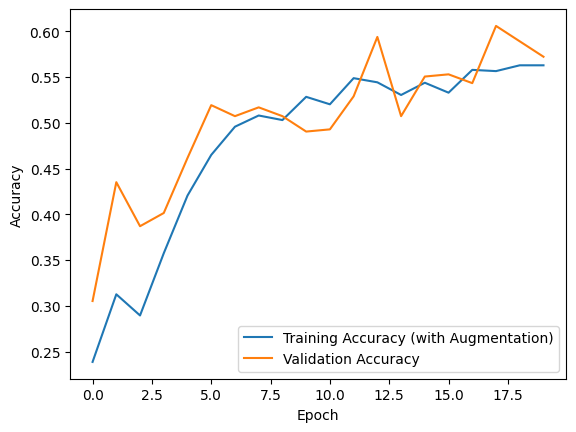

In [7]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Define ImageDataGenerator for data augmentation
train_datagen_augmented = ImageDataGenerator(
    rescale=1./255,
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest'
)

# Create augmented train generator
train_generator_augmented = train_datagen_augmented.flow_from_directory(
    train_dir,
    target_size=(180, 180),
    batch_size=32,
    class_mode='categorical',
    subset='training',
    seed=42
)

# Create the model
model_augmented = create_model(input_shape=(180, 180, 3), num_classes=9)

# Compile the model
model_augmented.compile(optimizer='adam',
                        loss='categorical_crossentropy',
                        metrics=['accuracy'])

# Train the model with augmented data
history_augmented = model_augmented.fit(train_generator_augmented,
                                        steps_per_epoch=train_generator_augmented.samples // 32,
                                        epochs=20,
                                        validation_data=validation_generator,
                                        validation_steps=validation_generator.samples // 32)

# Evaluate the augmented model
loss_augmented, accuracy_augmented = model_augmented.evaluate(validation_generator)
print(f"Validation Accuracy with Data Augmentation: {accuracy_augmented:.2f}")

# Plot training history
plt.plot(history_augmented.history['accuracy'], label='Training Accuracy (with Augmentation)')
plt.plot(history_augmented.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()


In [8]:
#install Augmentor
!pip install Augmentor

In [9]:
import os
import shutil
import Augmentor

# Define a function to create an Augmentor pipeline
def create_augmentor_pipeline(input_dir, output_dir, num_samples):
    # Create the output directory if it doesn't exist
    if not os.path.exists(output_dir):
        os.makedirs(output_dir)

    # Initialize Augmentor pipeline
    p = Augmentor.Pipeline(source_directory=input_dir, output_directory=output_dir)

    # Define augmentation operations
    p.rotate(probability=0.7, max_left_rotation=10, max_right_rotation=10)
    p.flip_left_right(probability=0.5)
    p.zoom_random(probability=0.5, percentage_area=0.8)
    p.random_distortion(probability=0.5, grid_width=4, grid_height=4, magnitude=8)

    # Sample images
    p.sample(num_samples)

# Define directories for augmented data
augmented_train_dir = "/content/AugmentedData/Train"

# Remove augmented_train_dir if it already exists
if os.path.exists(augmented_train_dir):
    shutil.rmtree(augmented_train_dir)

# Create Augmentor pipeline for data augmentation
create_augmentor_pipeline(train_dir, augmented_train_dir, num_samples=5000)


Initialised with 2239 image(s) found.
Output directory set to /content/AugmentedData/Train.

Processing <PIL.Image.Image image mode=RGB size=600x450 at 0x7B051B9BD090>: 100%|██████████| 5000/5000 [11:20<00:00,  7.34 Samples/s]


Found 5000 images belonging to 9 classes.
Epoch 1/20
156/156 [==============================] - 35s 215ms/step - loss: 1.8458 - accuracy: 0.3303 - val_loss: 1.7234 - val_accuracy: 0.3558
Epoch 2/20
156/156 [==============================] - 35s 224ms/step - loss: 1.4513 - accuracy: 0.4795 - val_loss: 1.6088 - val_accuracy: 0.3966
Epoch 3/20
156/156 [==============================] - 38s 241ms/step - loss: 1.3280 - accuracy: 0.5292 - val_loss: 1.3572 - val_accuracy: 0.5072
Epoch 4/20
156/156 [==============================] - 39s 248ms/step - loss: 1.2990 - accuracy: 0.5370 - val_loss: 1.3348 - val_accuracy: 0.5312
Epoch 5/20
156/156 [==============================] - 31s 201ms/step - loss: 1.1989 - accuracy: 0.5670 - val_loss: 1.4044 - val_accuracy: 0.4784
Epoch 6/20
156/156 [==============================] - 32s 208ms/step - loss: 1.1378 - accuracy: 0.5888 - val_loss: 1.2780 - val_accuracy: 0.5240
Epoch 7/20
156/156 [==============================] - 34s 215ms/step - loss: 1.0481 - ac

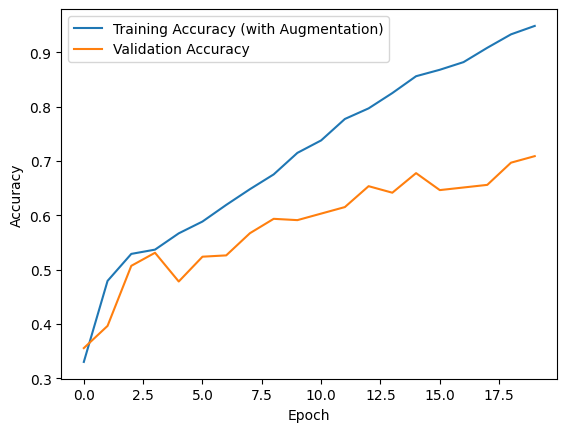

In [11]:
# Create ImageDataGenerator for augmented train data
train_datagen_augmented = ImageDataGenerator(
    rescale=1./255,
    # Since we already did Augmentation using Augmentator, we won't generate any augmented data
)

# Create augmented train generator
train_generator_augmented = train_datagen_augmented.flow_from_directory(
    augmented_train_dir,
    target_size=(180, 180),
    batch_size=32,
    class_mode='categorical',
    seed=42
)

# Rebuild the model
model_augmented = create_model(input_shape=(180, 180, 3), num_classes=9)

# Compile the model
model_augmented.compile(optimizer='adam',
                        loss='categorical_crossentropy',
                        metrics=['accuracy'])

# Train the model on augmented data
history_augmented = model_augmented.fit(train_generator_augmented,
                                        steps_per_epoch=train_generator_augmented.samples // 32,
                                        epochs=20,
                                        validation_data=validation_generator,
                                        validation_steps=validation_generator.samples // 32)

# Evaluate the model on validation data
loss_augmented, accuracy_augmented = model_augmented.evaluate(validation_generator)
print(f"Validation Accuracy with Augmented Data: {accuracy_augmented:.2f}")

# Plot training history
plt.plot(history_augmented.history['accuracy'], label='Training Accuracy (with Augmentation)')
plt.plot(history_augmented.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()


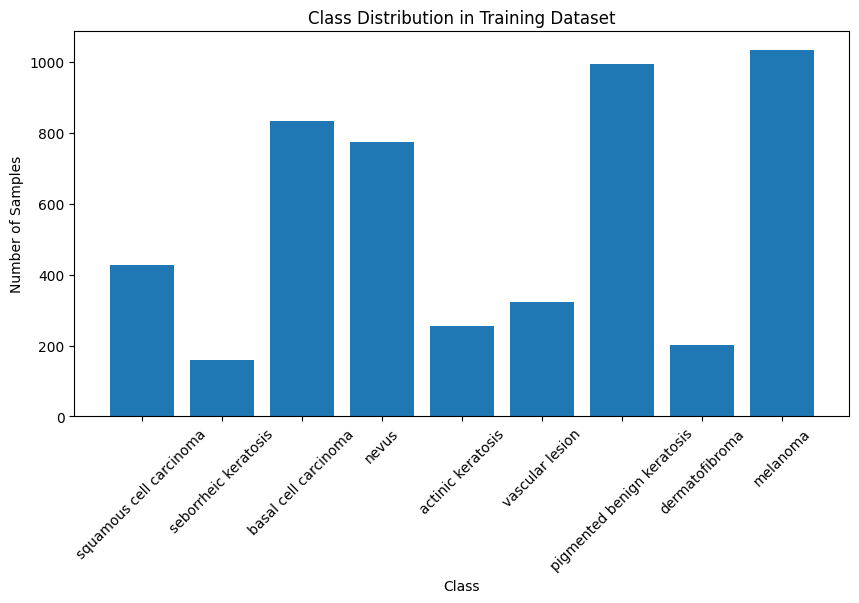

In [13]:
import os
import matplotlib.pyplot as plt

# Function to get class distribution
def get_class_distribution(directory):
    class_counts = {}
    for class_name in os.listdir(directory):
        class_dir = os.path.join(directory, class_name)
        class_counts[class_name] = len(os.listdir(class_dir))
    return class_counts

# Get class distribution for training dataset
train_class_distribution = get_class_distribution(augmented_train_dir)

# Plot class distribution
plt.figure(figsize=(10, 5))
plt.bar(train_class_distribution.keys(), train_class_distribution.values())
plt.xlabel('Class')
plt.ylabel('Number of Samples')
plt.title('Class Distribution in Training Dataset')
plt.xticks(rotation=45)
plt.show()


In [14]:
# Define the number of samples you want for each class after augmentation
desired_samples = 500

# Define directories for balanced training data
balanced_train_dir = "/BalancedData/Train"

# Remove balanced_train_dir if it already exists
if os.path.exists(balanced_train_dir):
    shutil.rmtree(balanced_train_dir)

# Create balanced dataset using Augmentor
for class_name, num_samples in train_class_distribution.items():
    input_dir = os.path.join(train_dir, class_name)
    output_dir = os.path.join(balanced_train_dir, class_name)
    create_augmentor_pipeline(input_dir, output_dir, desired_samples)


Initialised with 181 image(s) found.
Output directory set to /BalancedData/Train/squamous cell carcinoma.

Processing <PIL.Image.Image image mode=RGB size=600x450 at 0x7B056069EE90>: 100%|██████████| 500/500 [00:23<00:00, 20.92 Samples/s]


Initialised with 77 image(s) found.
Output directory set to /BalancedData/Train/seborrheic keratosis.

Processing <PIL.Image.Image image mode=RGB size=1024x768 at 0x7B056F778580>: 100%|██████████| 500/500 [01:03<00:00,  7.84 Samples/s]


Initialised with 376 image(s) found.
Output directory set to /BalancedData/Train/basal cell carcinoma.

Processing <PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=600x450 at 0x7B056065D4B0>: 100%|██████████| 500/500 [00:23<00:00, 21.16 Samples/s]


Initialised with 357 image(s) found.
Output directory set to /BalancedData/Train/nevus.

Processing <PIL.Image.Image image mode=RGB size=600x450 at 0x7B05601EA890>: 100%|██████████| 500/500 [02:09<00:00,  3.87 Samples/s]


Initialised with 114 image(s) found.
Output directory set to /BalancedData/Train/actinic keratosis.

Processing <PIL.Image.Image image mode=RGB size=600x450 at 0x7B056C266A70>: 100%|██████████| 500/500 [00:25<00:00, 19.69 Samples/s]


Initialised with 139 image(s) found.
Output directory set to /BalancedData/Train/vascular lesion.

Processing <PIL.Image.Image image mode=RGB size=600x450 at 0x7B056065E3E0>: 100%|██████████| 500/500 [00:22<00:00, 21.89 Samples/s]


Initialised with 462 image(s) found.
Output directory set to /BalancedData/Train/pigmented benign keratosis.

Processing <PIL.Image.Image image mode=RGB size=600x450 at 0x7B05607F9C90>: 100%|██████████| 500/500 [00:24<00:00, 20.26 Samples/s]


Initialised with 95 image(s) found.
Output directory set to /BalancedData/Train/dermatofibroma.

Processing <PIL.Image.Image image mode=RGB size=600x450 at 0x7B056F719D80>: 100%|██████████| 500/500 [00:23<00:00, 20.99 Samples/s]


Initialised with 438 image(s) found.
Output directory set to /BalancedData/Train/melanoma.

Processing <PIL.Image.Image image mode=RGB size=1024x768 at 0x7B056F778700>: 100%|██████████| 500/500 [02:30<00:00,  3.32 Samples/s]


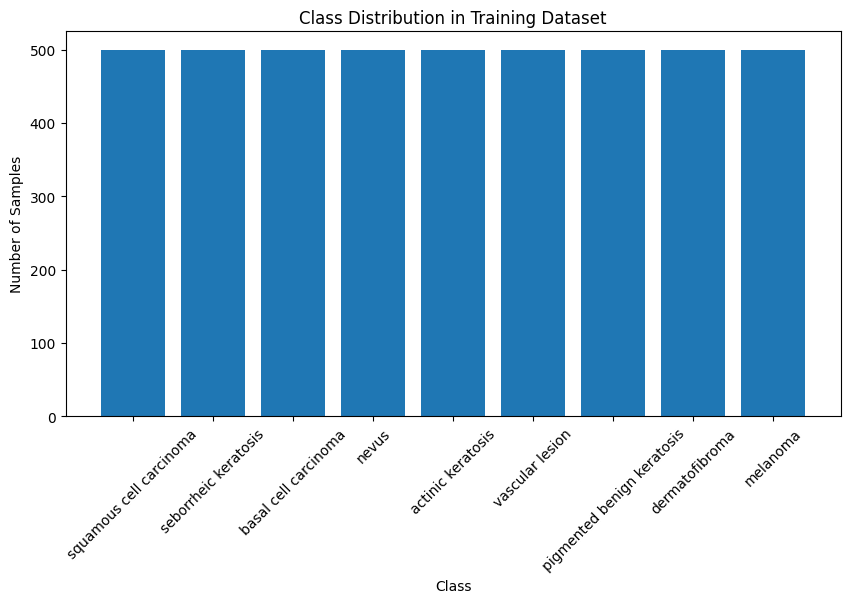

In [16]:
# Get class distribution for training dataset
train_class_distribution = get_class_distribution(balanced_train_dir)

# Plot class distribution
plt.figure(figsize=(10, 5))
plt.bar(train_class_distribution.keys(), train_class_distribution.values())
plt.xlabel('Class')
plt.ylabel('Number of Samples')
plt.title('Class Distribution in Training Dataset')
plt.xticks(rotation=45)
plt.show()


In [ ]:
# Create ImageDataGenerator for balanced train data
balanced_train_datagen = ImageDataGenerator(
    rescale=1./255,
    # Add any additional preprocessing or augmentation techniques here
)

# Create balanced train generator
balanced_train_generator = balanced_train_datagen.flow_from_directory(
    balanced_train_dir,
    target_size=(180, 180),
    batch_size=32,
    class_mode='categorical',
    seed=42
)

# Rebuild the model
model_balanced = create_model(input_shape=(180, 180, 3), num_classes=9)

# Compile the model
model_balanced.compile(optimizer='adam',
                        loss='categorical_crossentropy',
                        metrics=['accuracy'])

# Train the model on balanced data
history_balanced = model_balanced.fit(balanced_train_generator,
                                      steps_per_epoch=balanced_train_generator.samples // 32,
                                      epochs=30,
                                      validation_data=validation_generator,
                                      validation_steps=validation_generator.samples // 32)

# Evaluate the model on validation data
loss_balanced, accuracy_balanced = model_balanced.evaluate(validation_generator)
print(f"Validation Accuracy with Balanced Data: {accuracy_balanced:.2f}")

# Plot training history
plt.plot(history_balanced.history['accuracy'], label='Training Accuracy (Balanced Data)')
plt.plot(history_balanced.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

Found 4500 images belonging to 9 classes.
Epoch 1/30
140/140 [==============================] - 30s 203ms/step - loss: 1.8524 - accuracy: 0.2728 - val_loss: 1.7713 - val_accuracy: 0.2933
Epoch 2/30
140/140 [==============================] - 30s 215ms/step - loss: 1.5343 - accuracy: 0.3995 - val_loss: 1.5599 - val_accuracy: 0.4952
Epoch 3/30
140/140 [==============================] - 26s 184ms/step - loss: 1.4035 - accuracy: 0.4503 - val_loss: 1.5092 - val_accuracy: 0.4832
Epoch 4/30
140/140 [==============================] - 26s 183ms/step - loss: 1.3263 - accuracy: 0.4823 - val_loss: 1.4333 - val_accuracy: 0.5240
Epoch 5/30
140/140 [==============================] - 26s 186ms/step - loss: 1.2178 - accuracy: 0.5336 - val_loss: 1.6959 - val_accuracy: 0.4495
Epoch 6/30
129/140 [==========================>...] - ETA: 1s - loss: 1.2008 - accuracy: 0.5505